<a href="https://colab.research.google.com/github/Imran012x/hilsha/blob/main/Transfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")

#Data Preprocessing

In [3]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/Hilsha/data_fish_224_11k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

import os
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define fish class names and their directories
fish_classes = ['ilish', 'chandana', 'sardin', 'sardinella', 'punctatus']
data_dir = '/content/'  # Base directory containing fish folders

# Define the number of images to select per class
image_limits = {
    'ilish': 3500,
    'chandana': 2000,
    'sardin': 3000,
    'sardinella': 1000,
    'punctatus': 1500
}

# image_limits = {
#     'ilish': 1000,
#     'chandana': 1000,
#     'sardin': 1000,
#     'sardinella': 500,
#     'punctatus': 500
# }


# Function to process images with a limit
def load_images(class_name, max_images):
    image_path = os.path.join(data_dir, class_name)
    images = sorted(os.listdir(image_path))
    random.shuffle(images)  # Shuffle for randomness
    selected_images = images[:max_images]  # Select only the required number

    return [np.array(Image.open(os.path.join(image_path, img)).resize((224, 224)).convert('RGB')) for img in selected_images]

# Load images and labels
data, labels = [], []
for idx, class_name in enumerate(fish_classes):
    class_images = load_images(class_name, image_limits[class_name])  # Apply limit
    data.extend(class_images)
    labels.extend([idx] * len(class_images))

# Convert to numpy arrays
X = np.array(data)
Y = np.array(labels)

# # Split dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

# # Normalize pixel values to [0,1]
# X_train_scaled = X_train / 255.0
# X_test_scaled = X_test / 255.0

# Print dataset information
# print(f"Class counts: {dict(zip(*np.unique(Y, return_counts=True)))}")
# print(f"Shapes - X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}")

GPU Available: True
GPU Name: Tesla T4


1 GPUs detected.
Class distribution after SMOTE: Counter({np.int64(3): 2800, np.int64(0): 2800, np.int64(1): 2800, np.int64(4): 2800, np.int64(2): 2800})
Training Fold 1/2
Epoch 1/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 216s 198ms/step - accuracy: 0.7121 - loss: 0.8533 - val_accuracy: 0.9396 - val_loss: 0.1711 - learning_rate: 0.0010
Epoch 2/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 156s 178ms/step - accuracy: 0.9040 - loss: 0.2941 - val_accuracy: 0.9163 - val_loss: 0.2632 - learning_rate: 0.0010
Training Fold 2/2
Epoch 1/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 211s 196ms/step - accuracy: 0.7230 - loss: 0.7781 - val_accuracy: 0.9249 - val_loss: 0.2133 - learning_rate: 0.0010
Epoch 2/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 161s 184ms/step - accuracy: 0.8982 - loss: 0.2941 - val_accuracy: 0.9379 - val_loss: 0.1637 - learning_rate: 0.0010
Training Complete with Learnable Weighted Ensemble.

Fold-by-Fold Visualizations:

Evaluating Fold 1:
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step


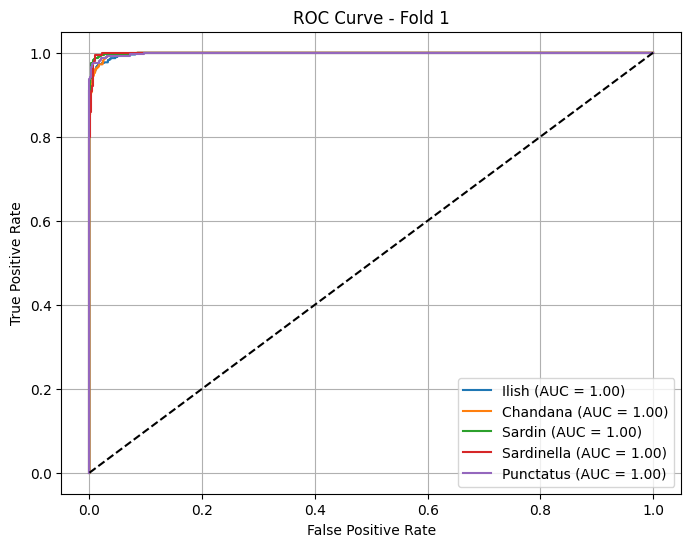

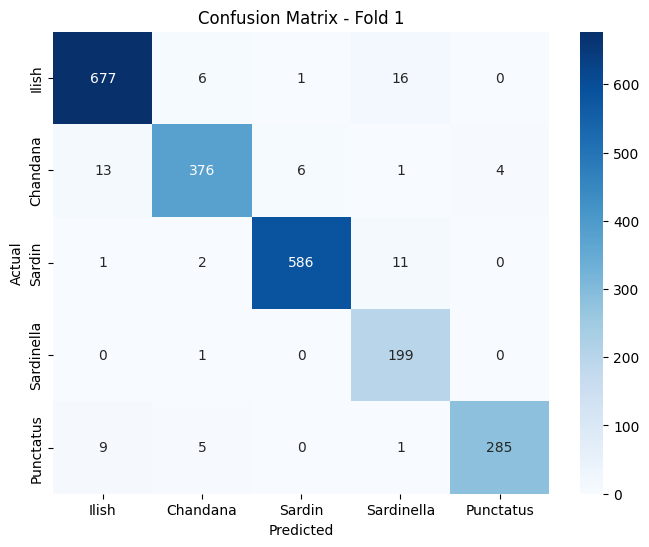

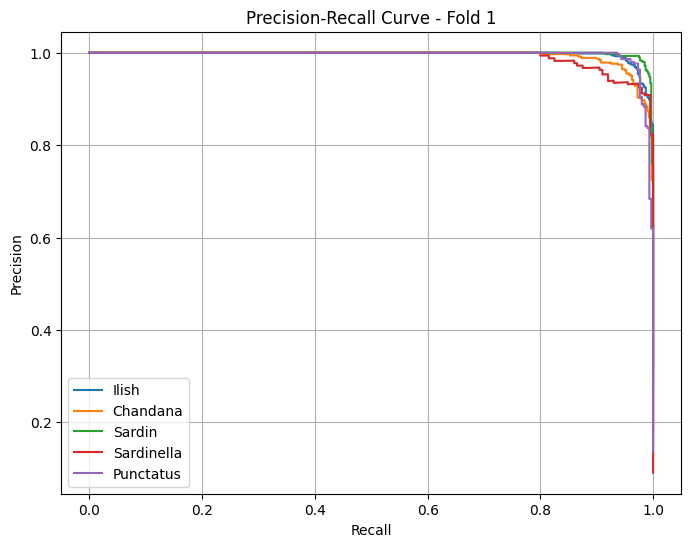

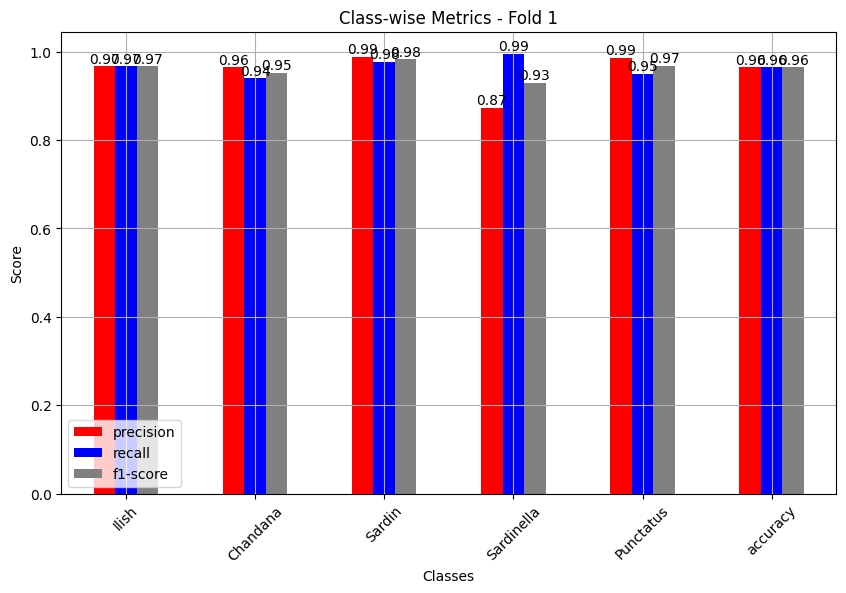

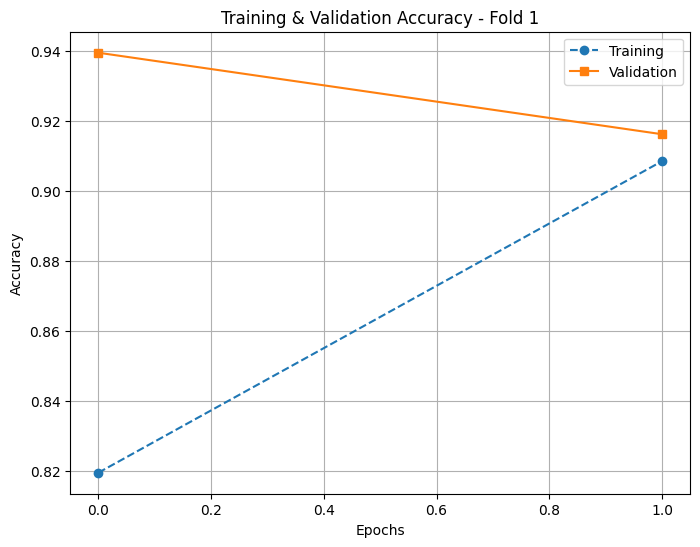

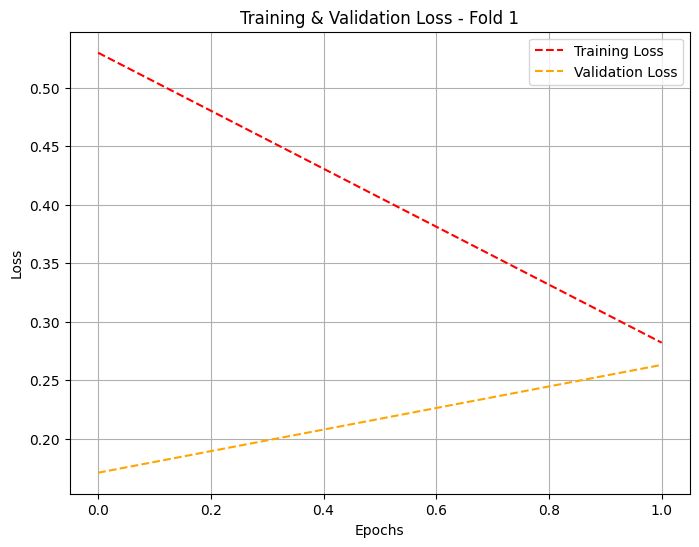

Classification Report - Fold 1:
              precision    recall  f1-score   support

       Ilish       0.97      0.97      0.97       700
    Chandana       0.96      0.94      0.95       400
      Sardin       0.99      0.98      0.98       600
  Sardinella       0.87      0.99      0.93       200
   Punctatus       0.99      0.95      0.97       300

    accuracy                           0.96      2200
   macro avg       0.96      0.97      0.96      2200
weighted avg       0.97      0.96      0.97      2200


Evaluating Fold 2:
275/275 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step


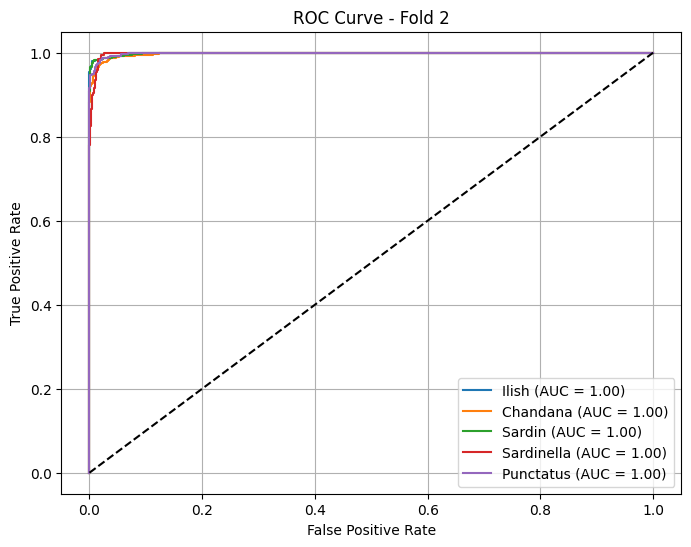

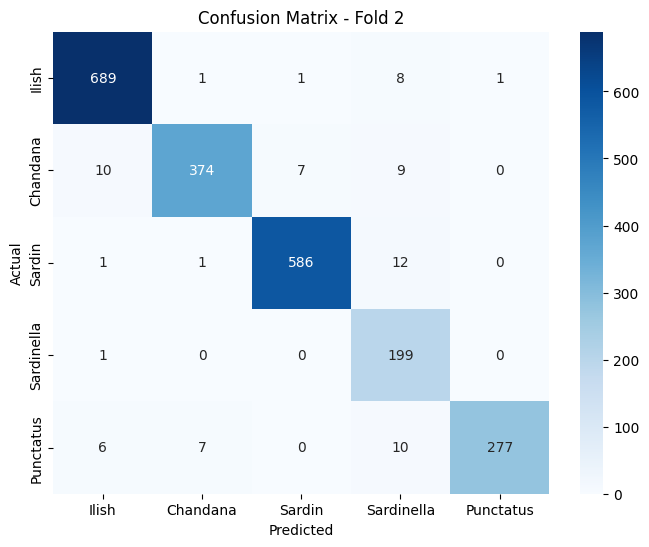

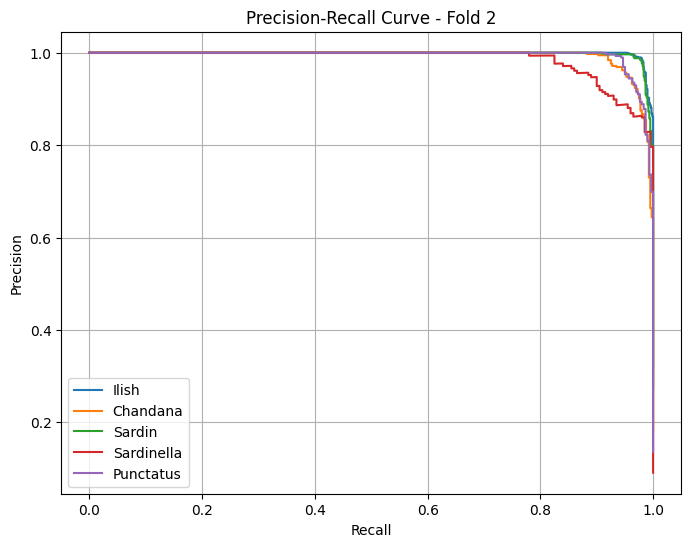

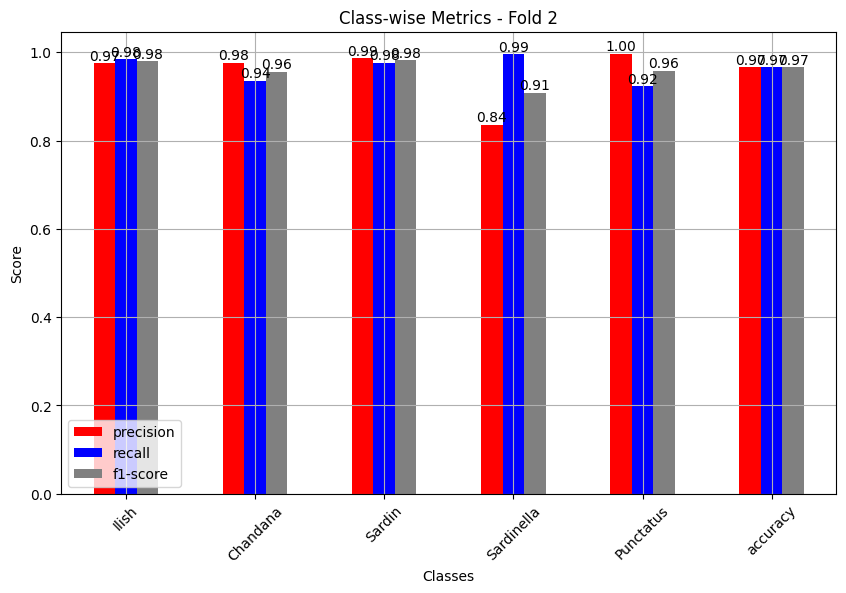

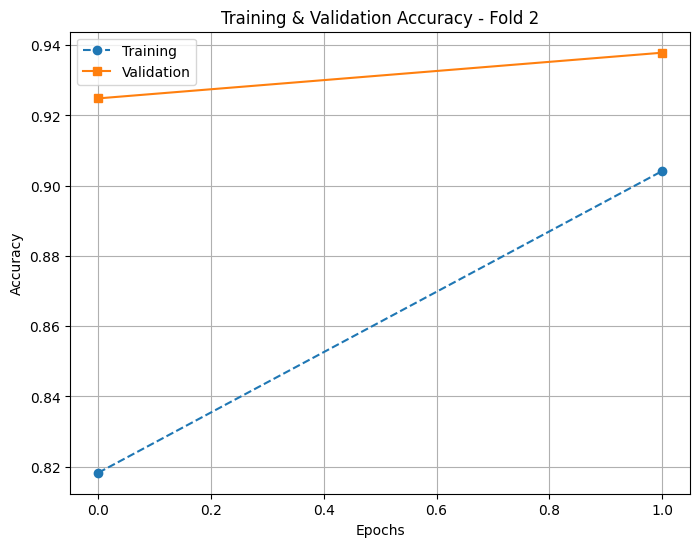

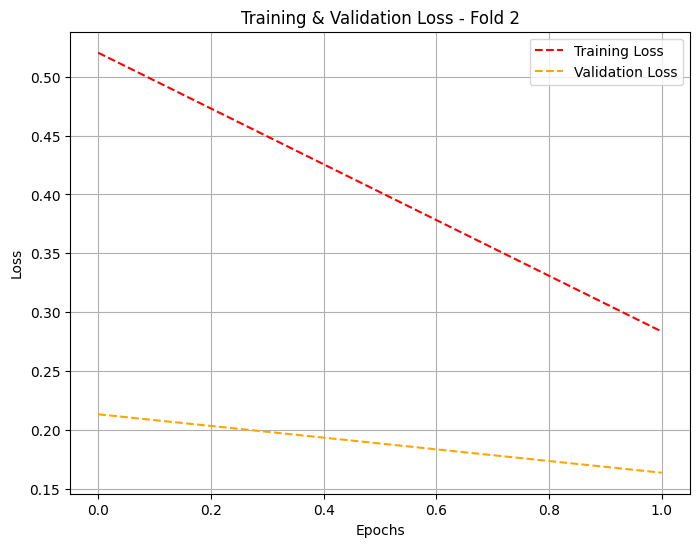

Classification Report - Fold 2:
              precision    recall  f1-score   support

       Ilish       0.97      0.98      0.98       700
    Chandana       0.98      0.94      0.96       400
      Sardin       0.99      0.98      0.98       600
  Sardinella       0.84      0.99      0.91       200
   Punctatus       1.00      0.92      0.96       300

    accuracy                           0.97      2200
   macro avg       0.95      0.96      0.96      2200
weighted avg       0.97      0.97      0.97      2200


Combined Results for All Folds:


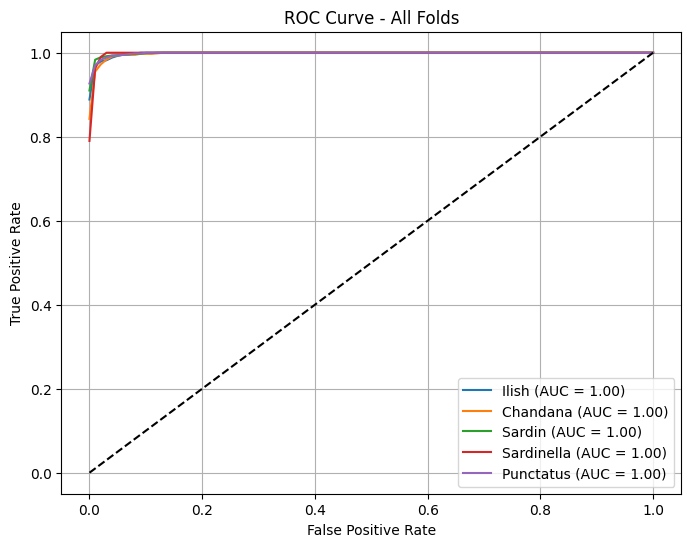

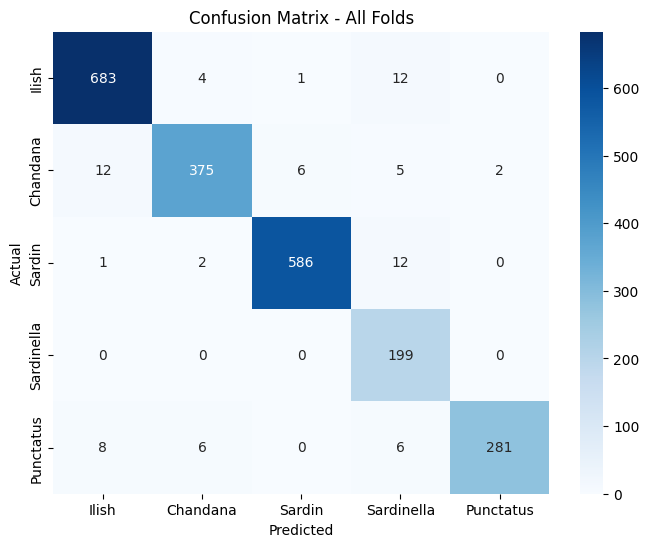

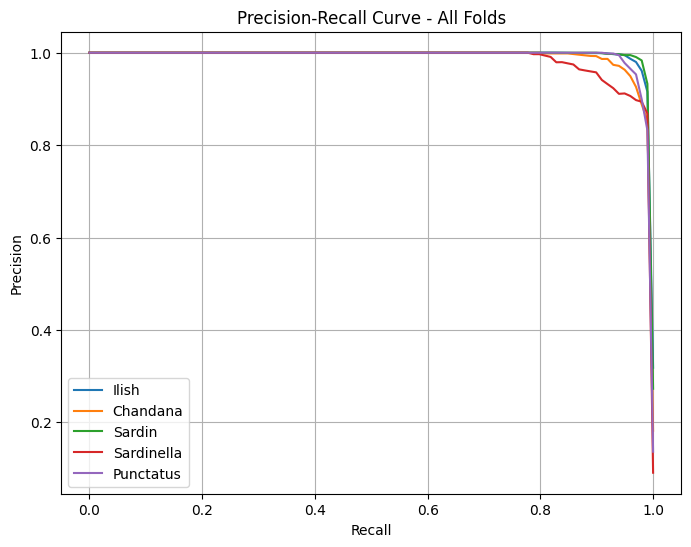

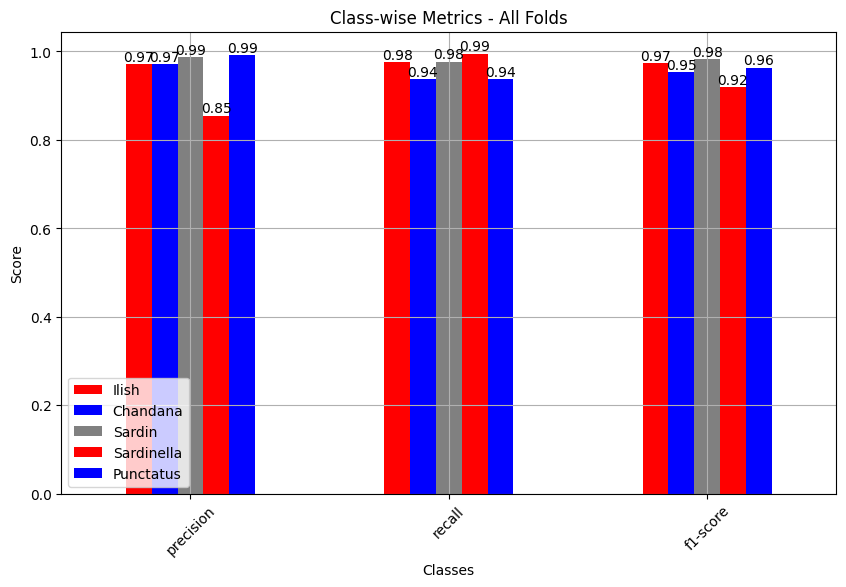

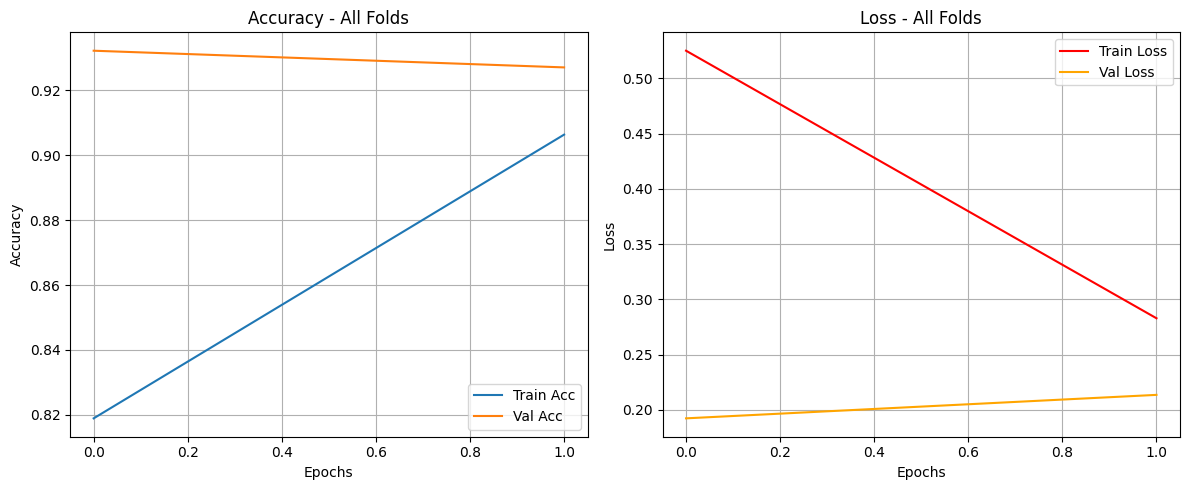


Final Combined Report (Learnable Weighted Ensemble):
              precision    recall  f1-score   support

       Ilish       0.97      0.97      0.97       700
    Chandana       0.97      0.95      0.96       400
      Sardin       0.99      0.98      0.98       600
  Sardinella       0.84      1.00      0.92       200
   Punctatus       1.00      0.94      0.97       300

    accuracy                           0.97      2200
   macro avg       0.95      0.97      0.96      2200
weighted avg       0.97      0.97      0.97      2200

Final Accuracy: 0.9664, F1-Score: 0.9668


In [ ]:
# Install required packages
!pip install imbalanced-learn

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Lambda
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
from collections import Counter

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"{len(gpus)} GPUs detected.")
else:
    print("No GPU detected. Running on CPU.")

# Parameters
input_shape = (224, 224, 3)
num_classes = 5
batch_size = 8
epochs = 2
k_folds = 2
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Assuming X and Y are loaded
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Normalize in batches (commented out)
# def normalize_in_batches(data, batch_size=1000):
#     data = data.astype('float32')
#     for i in range(0, len(data), batch_size):
#         data[i:min(i + batch_size, len(data))] /= 255.0
#     return data

# X_train_scaled = normalize_in_batches(X_train)
# X_test_scaled = normalize_in_batches(X_test)
X_train_scaled = X_train  # Use raw data as-is
X_test_scaled = X_test    # Use raw data as-is

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled.reshape(X_train_scaled.shape[0], -1), Y_train)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Image Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

def batch_generator(X, Y, batch_size=8):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            batch_idx = indices[start:min(start + batch_size, size)]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, Y_batch  # Sparse labels for sparse_categorical_crossentropy

# Define Base Models
def create_base_model(input_shape=(224, 224, 3), model_type='ResNet'):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape) if model_type == 'ResNet' else EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers[:-5]:
        layer.trainable = False
    for layer in base.layers[-5:]:
        layer.trainable = True
    return base

# Define Ensemble Model with Fixed Shape and Type Correction
def create_ensemble_model(input_shape=(224, 224, 3), num_classes=5):
    # Create base models
    model1 = create_base_model(input_shape, model_type='ResNet')
    model2 = create_base_model(input_shape, model_type='EfficientNet')

    # Rename layers to avoid name clashes
    for layer in model1.layers:
        layer._name = f"resnet_{layer.name}"
    for layer in model2.layers:
        layer._name = f"efficientnet_{layer.name}"

    input_layer = Input(shape=input_shape)
    output1 = model1(input_layer)
    output2 = model2(input_layer)

    output1 = GlobalAveragePooling2D()(output1)  # Shape: (None, 2048) for ResNet50
    output2 = GlobalAveragePooling2D()(output2)  # Shape: (None, 1280) for EfficientNetB0

    # Project both outputs to a common dimension (e.g., 1280)
    output1 = Dense(1280, activation='relu')(output1)  # Outputs float32 by default
    output2 = Dense(1280, activation='relu')(output2)  # Outputs float32 by default

    # # Cast outputs to float16 to match alpha and mixed precision policy
    # output1 = tf.cast(output1, tf.float16)
    # output2 = tf.cast(output2, tf.float16)

    # Cast outputs to float16 using Lambda layer to match alpha and mixed precision policy
    output1 = Lambda(lambda x: tf.cast(x, tf.float16))(output1)
    output2 = Lambda(lambda x: tf.cast(x, tf.float16))(output2)

    # alpha = tf.Variable(0.5, trainable=True, dtype=tf.float16, name="alpha")
    # ensemble_output = Lambda(lambda x: alpha * x[0] + (1 - alpha) * x[1],
    #                          output_shape=(1280,))([output1, output2])

    alpha = tf.Variable(0.5, trainable=True, dtype=tf.float16, name="alpha")
    ensemble_output = Lambda(lambda x: alpha * tf.cast(x[0], tf.float16) + (1 - alpha) * tf.cast(x[1], tf.float16),
                         output_shape=(1280,))([output1, output2])

    x = Dense(128, activation='relu')(ensemble_output)
    x = Dropout(0.5)(x)
    final_output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=final_output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Training
def train_with_kfold(X_train, Y_train, X_test, Y_test, k=2, batch_size=8, epochs=2):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    histories = []
    trained_models = []

    with tf.device('/GPU:0'):
        for fold_no, (train_idx, val_idx) in enumerate(skf.split(X_train, Y_train), 1):
            print(f"Training Fold {fold_no}/{k}")
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

            ensemble_model = create_ensemble_model(input_shape, num_classes)

            train_gen = batch_generator(X_train_fold, Y_train_fold, batch_size)
            val_gen = batch_generator(X_val_fold, Y_val_fold, batch_size)

            callbacks = [
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
                ModelCheckpoint(f'best_ensemble_model_{fold_no}.weights.h5', save_best_only=True,
                                monitor='val_accuracy', mode='max', save_weights_only=True),
                EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
            ]

            history = ensemble_model.fit(train_gen, validation_data=val_gen, epochs=epochs,
                                         steps_per_epoch=len(X_train_fold)//batch_size,
                                         validation_steps=len(X_val_fold)//batch_size, callbacks=callbacks, verbose=1)

            histories.append(history)
            trained_models.append(ensemble_model)

            tf.keras.backend.clear_session()
            gc.collect()

    return histories, trained_models

# Evaluation and Plotting
def evaluate_and_plot(histories, X_test, Y_test, trained_models):
    ensemble_probs_list, ensemble_preds_list = [], []

    with tf.device('/GPU:0'):
        # Fold-wise Visualization
        print("\nFold-by-Fold Visualizations:")
        for fold_no, (model, history) in enumerate(zip(trained_models, histories), 1):
            print(f"\nEvaluating Fold {fold_no}:")
            probs = model.predict(X_test, batch_size=8)
            preds = np.argmax(probs, axis=1)
            ensemble_probs_list.append(probs)
            ensemble_preds_list.append(preds)

            # Fold-wise Plots
            def plot_roc_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], 'k--')
                plt.title(f'ROC Curve - Fold {fold_no}')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_confusion_fold(Y_test, preds, fold_no):
                cm = confusion_matrix(Y_test, preds)
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
                plt.title(f'Confusion Matrix - Fold {fold_no}')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

            def plot_pr_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    plt.plot(recall, precision, label=cls)
                plt.title(f'Precision-Recall Curve - Fold {fold_no}')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_metrics_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels, output_dict=True)
                df = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]
                df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
                for p in plt.gca().patches:
                    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
                plt.title(f'Class-wise Metrics - Fold {fold_no}')
                plt.xlabel('Classes')
                plt.ylabel('Score')
                plt.xticks(rotation=45)
                plt.legend()
                plt.grid()
                plt.show()

            def plot_acc_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['accuracy'], label='Training', linestyle='dashed', marker='o')
                plt.plot(history.history['val_accuracy'], label='Validation', marker='s')
                plt.title(f'Training & Validation Accuracy - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_loss_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
                plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
                plt.title(f'Training & Validation Loss - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid()
                plt.show()

            def print_report_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels)
                print(f"Classification Report - Fold {fold_no}:\n{report}")

            # Execute Fold-wise Plots
            plot_roc_fold(Y_test, probs, fold_no)
            plot_confusion_fold(Y_test, preds, fold_no)
            plot_pr_fold(Y_test, probs, fold_no)
            plot_metrics_fold(Y_test, preds, fold_no)
            plot_acc_fold(history, fold_no)
            plot_loss_fold(history, fold_no)
            print_report_fold(Y_test, preds, fold_no)

            tf.keras.backend.clear_session()
            gc.collect()

        # Combined Visualizations
        print("\nCombined Results for All Folds:")
        def plot_roc_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_fpr = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                tprs, aucs = [], []
                for probs in probs_list:
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    tprs.append(np.interp(mean_fpr, fpr, tpr))
                    aucs.append(auc(fpr, tpr))
                mean_tpr = np.mean(tprs, axis=0)
                mean_auc = auc(mean_fpr, mean_tpr)
                plt.plot(mean_fpr, mean_tpr, label=f'{cls} (AUC = {mean_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title('ROC Curve - All Folds')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_confusion_combined(Y_test, preds_list):
            mean_cm = np.mean([confusion_matrix(Y_test, preds) for preds in preds_list], axis=0)
            plt.figure(figsize=(8, 6))
            sns.heatmap(mean_cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
            plt.title('Confusion Matrix - All Folds')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

        def plot_pr_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_recall = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                precisions = []
                for probs in probs_list:
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    precisions.append(np.interp(mean_recall[::-1], recall[::-1], precision[::-1])[::-1])
                mean_precision = np.mean(precisions, axis=0)
                plt.plot(mean_recall, mean_precision, label=cls)
            plt.title('Precision-Recall Curve - All Folds')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_metrics_combined(Y_test, preds_list):
            reports = [classification_report(Y_test, preds, target_names=class_labels, output_dict=True) for preds in preds_list]
            mean_report = {metric: {cls: np.mean([r[cls][metric] for r in reports]) for cls in class_labels}
                           for metric in ['precision', 'recall', 'f1-score']}
            df = pd.DataFrame(mean_report).T
            df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            plt.title('Class-wise Metrics - All Folds')
            plt.xlabel('Classes')
            plt.ylabel('Score')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid()
            plt.show()

        def plot_acc_loss_combined(histories):
            plt.figure(figsize=(12, 5))
            mean_acc = np.mean([h.history['accuracy'] for h in histories], axis=0)
            mean_val_acc = np.mean([h.history['val_accuracy'] for h in histories], axis=0)
            mean_loss = np.mean([h.history['loss'] for h in histories], axis=0)
            mean_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)
            plt.subplot(1, 2, 1)
            plt.plot(mean_acc, label='Train Acc')
            plt.plot(mean_val_acc, label='Val Acc')
            plt.title('Accuracy - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid()
            plt.subplot(1, 2, 2)
            plt.plot(mean_loss, label='Train Loss', color='red')
            plt.plot(mean_val_loss, label='Val Loss', color='orange')
            plt.title('Loss - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.show()

        def print_final_report(Y_test, probs_list):
            mean_probs = np.mean(probs_list, axis=0)
            final_preds = np.argmax(mean_probs, axis=1)
            report = classification_report(Y_test, final_preds, target_names=class_labels)
            acc = accuracy_score(Y_test, final_preds)
            f1 = f1_score(Y_test, final_preds, average='weighted')
            print(f"\nFinal Combined Report (Learnable Weighted Ensemble):\n{report}")
            print(f"Final Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")

        # Execute Combined Plots
        plot_roc_combined(Y_test, ensemble_probs_list)
        plot_confusion_combined(Y_test, ensemble_preds_list)
        plot_pr_combined(Y_test, ensemble_probs_list)
        plot_metrics_combined(Y_test, ensemble_preds_list)
        plot_acc_loss_combined(histories)
        print_final_report(Y_test, ensemble_probs_list)

# Train and Evaluate
histories, trained_models = train_with_kfold(X_train_resampled, Y_train_resampled, X_test_scaled, Y_test)
print("Training Complete with Learnable Weighted Ensemble.")
evaluate_and_plot(histories, X_test_scaled, Y_test, trained_models)

1 GPUs detected.
Class distribution after SMOTE: Counter({np.int64(3): 2800, np.int64(0): 2800, np.int64(1): 2800, np.int64(4): 2800, np.int64(2): 2800})
Training Fold 1/5
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/6
350/350 ━━━━━━━━━━━━━━━━━━━━ 183s 405ms/step - accuracy: 0.7471 - loss: 0.7084 - val_accuracy: 0.9339 - val_loss: 0.1820 - learning_rate: 0.0010
Epoch 2/6
350/350 ━━━━━━━━━━━━━━━━━━━━ 129s 371ms/step - accuracy: 0.9351 - loss: 0.2004 - val_accuracy: 0.9479 - val_loss: 0.1545 - learning_rate: 0.0010
Epoch 3/6
350/350 ━━━━━━━━━━━━━━━━━━━━ 129s 370ms/step - accuracy: 0.9515 - loss: 0.1595 - val_accuracy: 0.9619 - val_loss: 0.1081 - learning_rate: 0.0010
Epoch 4/6
350/350 ━━━━━━━━━━━━━━━━━━━━ 137s 392ms/step - accuracy: 0.9579 - loss: 0.1222 - val_accuracy: 0.9660 - val_loss: 0.0965 - learning_rate: 0.0010
Epoch 5/6
350/350 ━━━━━━━━━━━━━━━━━━━━ 125s 358ms/step - accuracy: 0.9643 - loss: 0.1074 - val_accuracy: 0

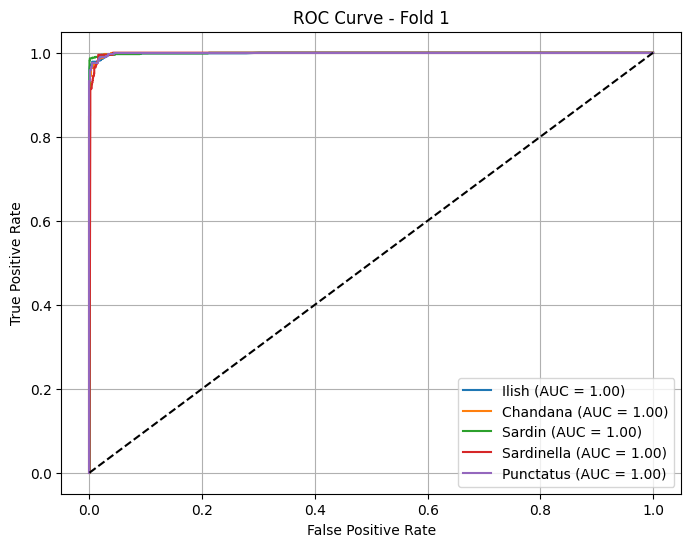

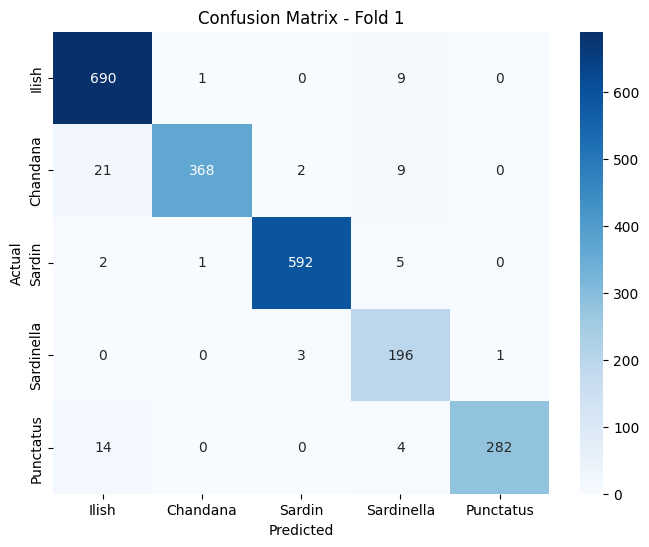

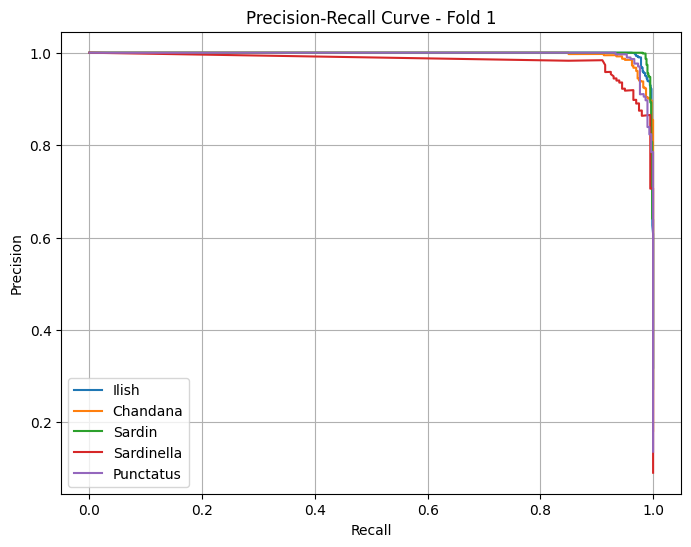

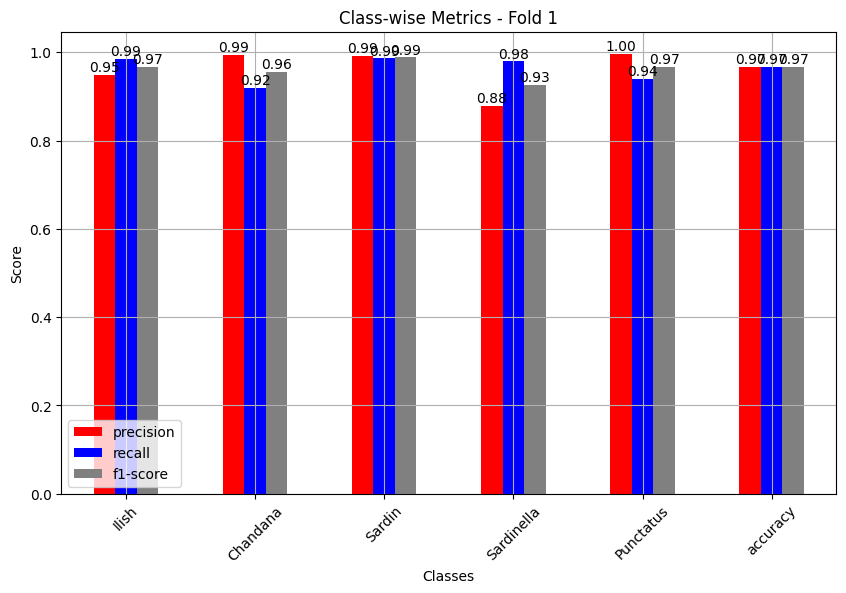

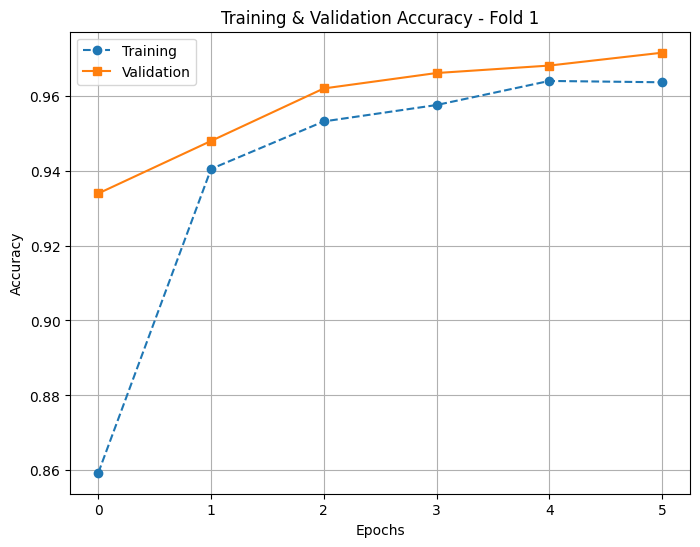

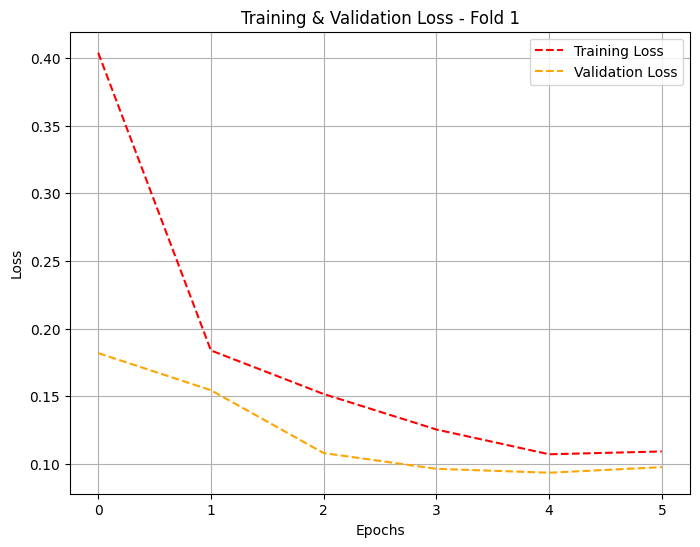

Classification Report - Fold 1:
              precision    recall  f1-score   support

       Ilish       0.95      0.99      0.97       700
    Chandana       0.99      0.92      0.96       400
      Sardin       0.99      0.99      0.99       600
  Sardinella       0.88      0.98      0.93       200
   Punctatus       1.00      0.94      0.97       300

    accuracy                           0.97      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.97      0.97      0.97      2200


Evaluating Fold 2:
275/275 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step


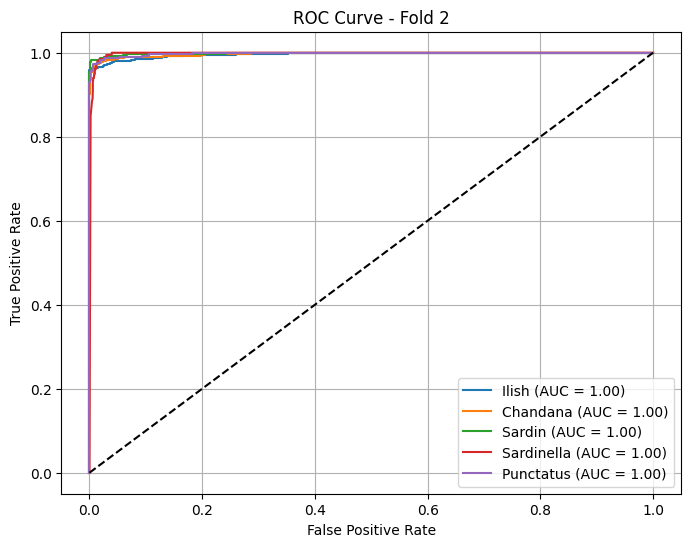

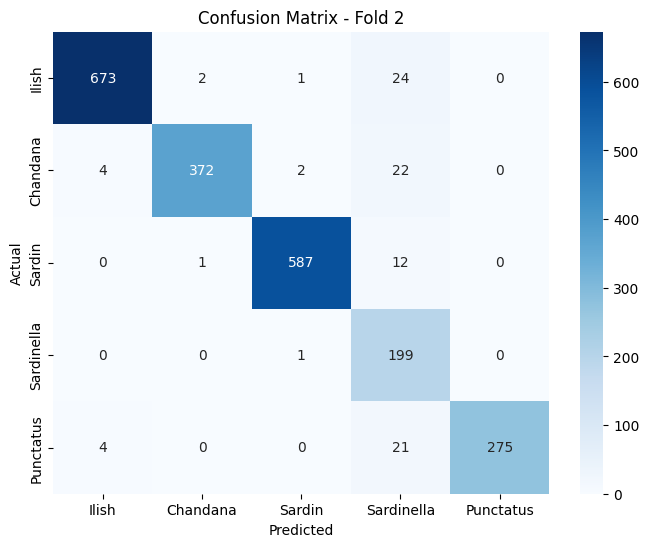

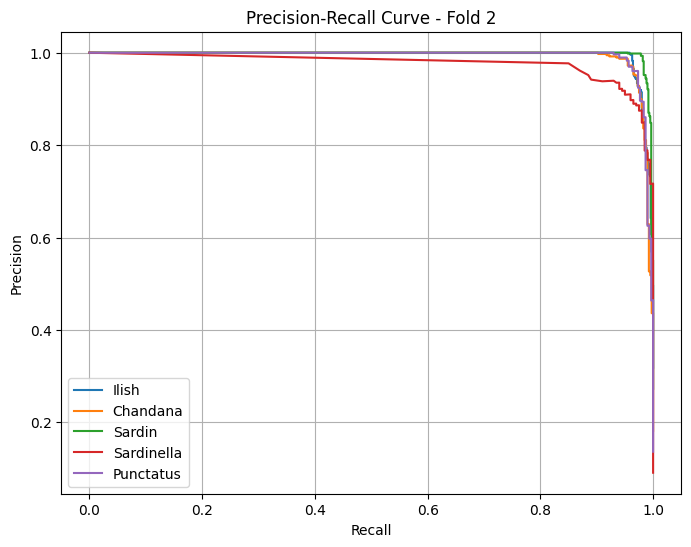

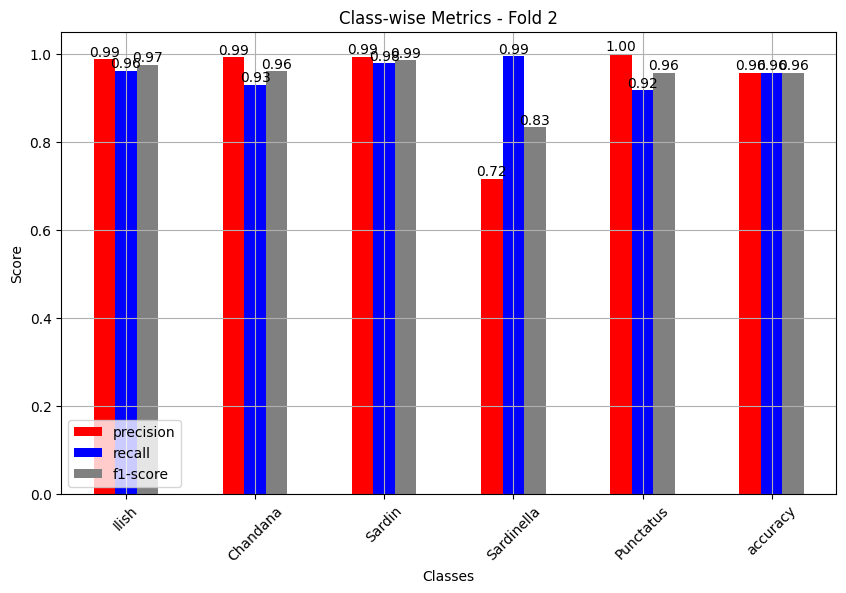

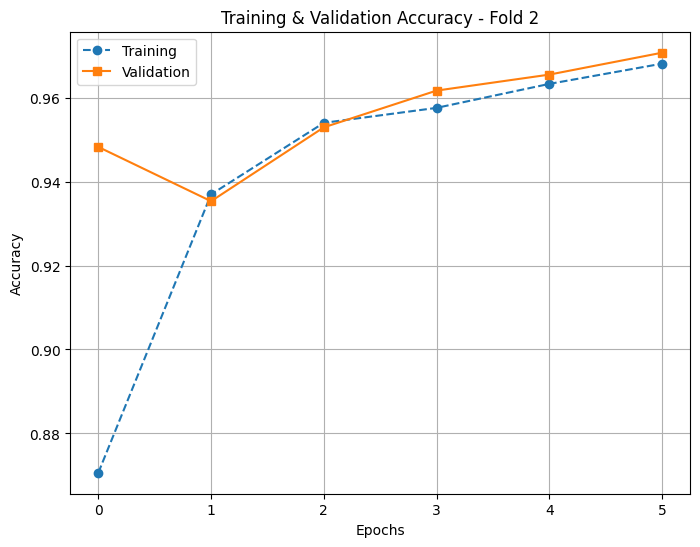

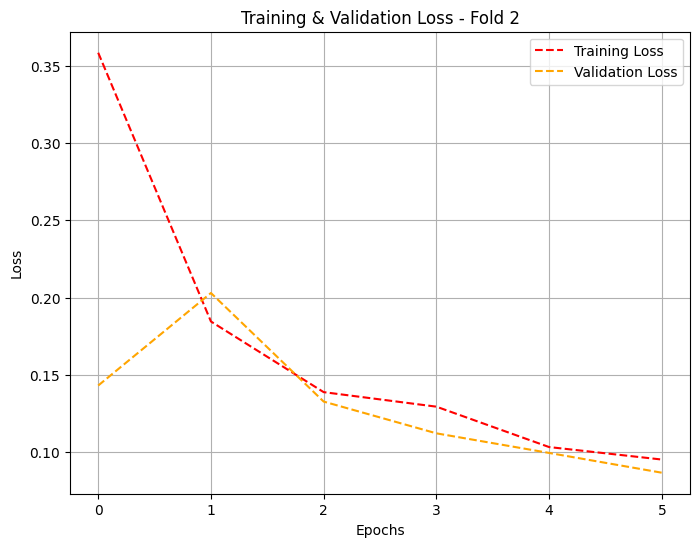

Classification Report - Fold 2:
              precision    recall  f1-score   support

       Ilish       0.99      0.96      0.97       700
    Chandana       0.99      0.93      0.96       400
      Sardin       0.99      0.98      0.99       600
  Sardinella       0.72      0.99      0.83       200
   Punctatus       1.00      0.92      0.96       300

    accuracy                           0.96      2200
   macro avg       0.94      0.96      0.94      2200
weighted avg       0.97      0.96      0.96      2200


Evaluating Fold 3:
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step


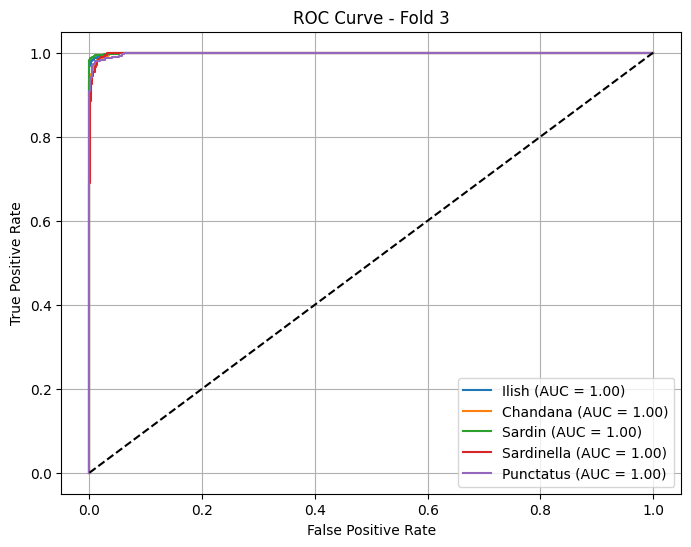

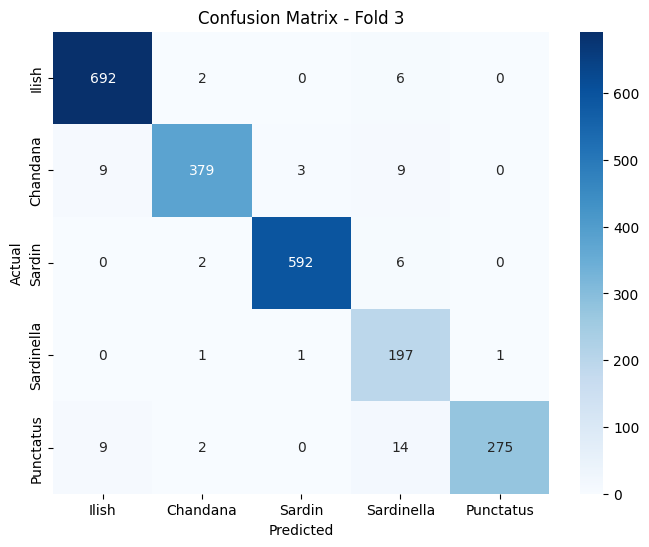

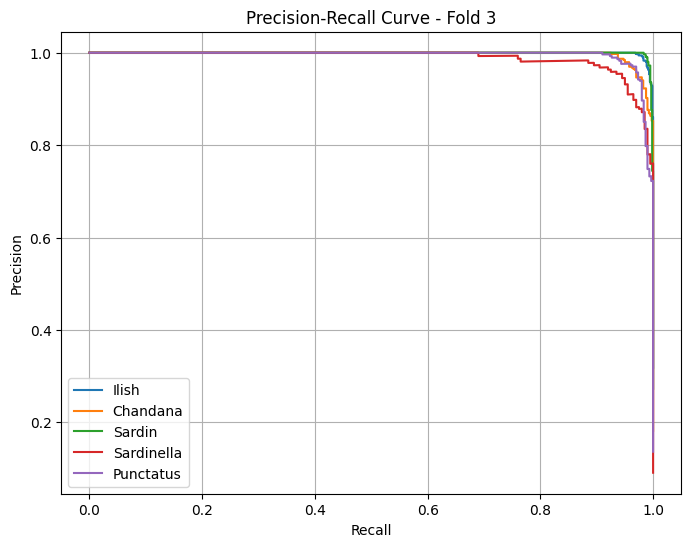

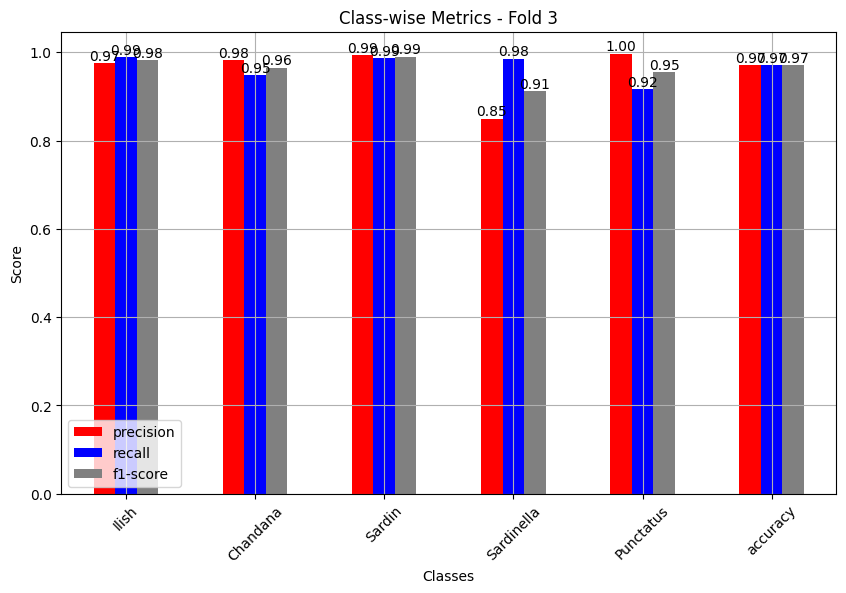

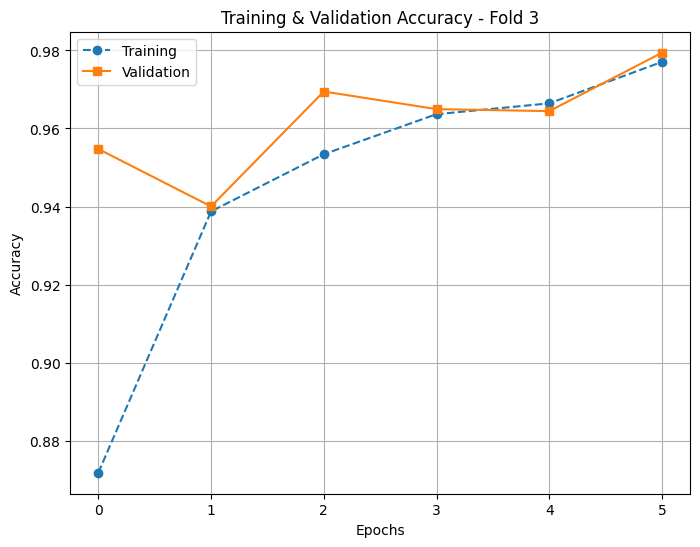

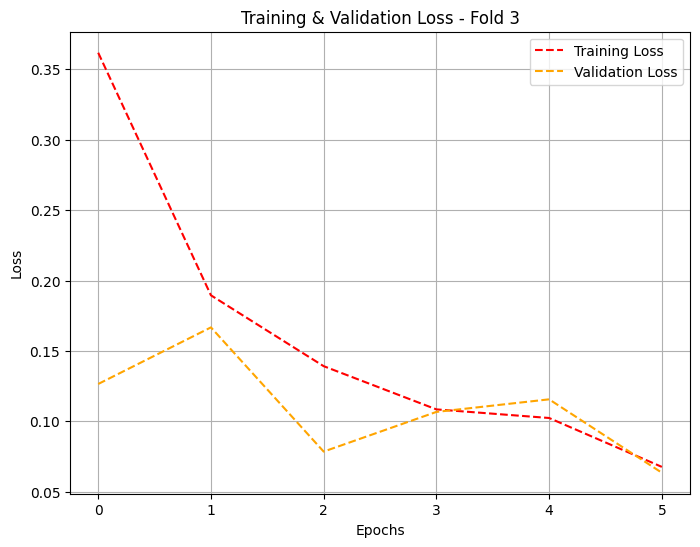

Classification Report - Fold 3:
              precision    recall  f1-score   support

       Ilish       0.97      0.99      0.98       700
    Chandana       0.98      0.95      0.96       400
      Sardin       0.99      0.99      0.99       600
  Sardinella       0.85      0.98      0.91       200
   Punctatus       1.00      0.92      0.95       300

    accuracy                           0.97      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.97      0.97      0.97      2200


Evaluating Fold 4:
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step


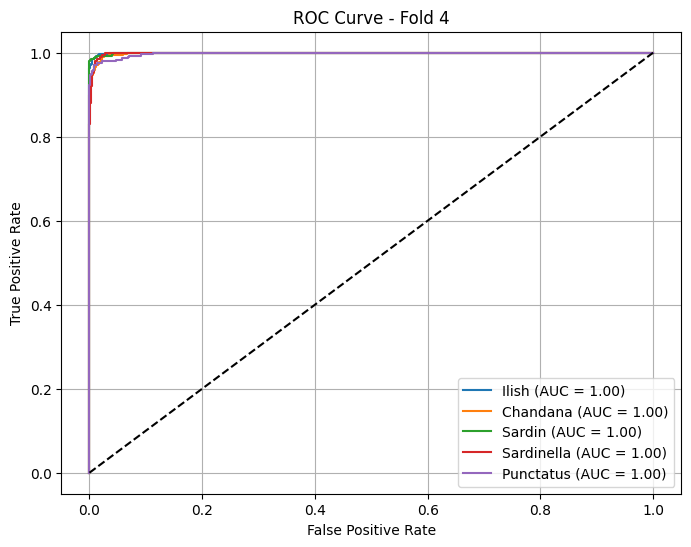

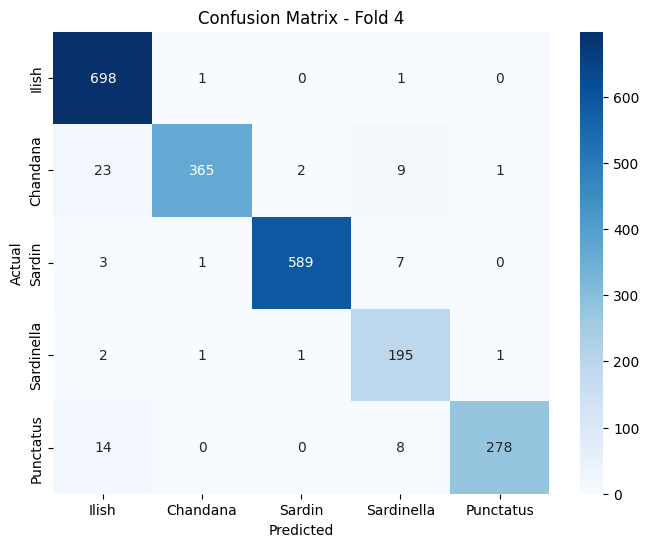

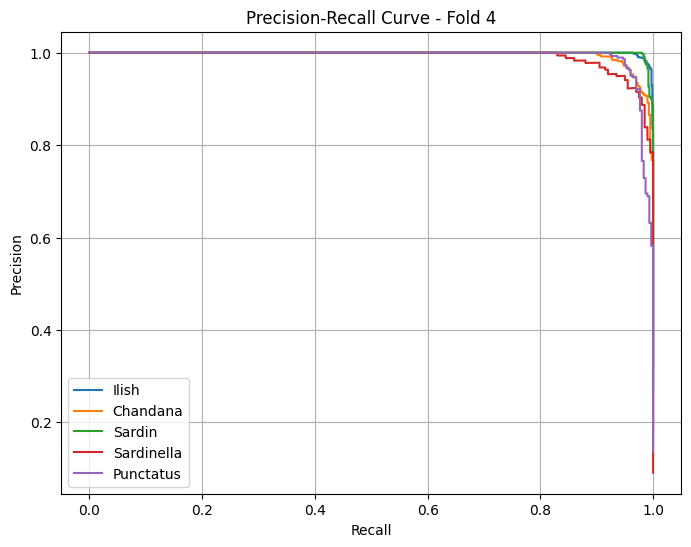

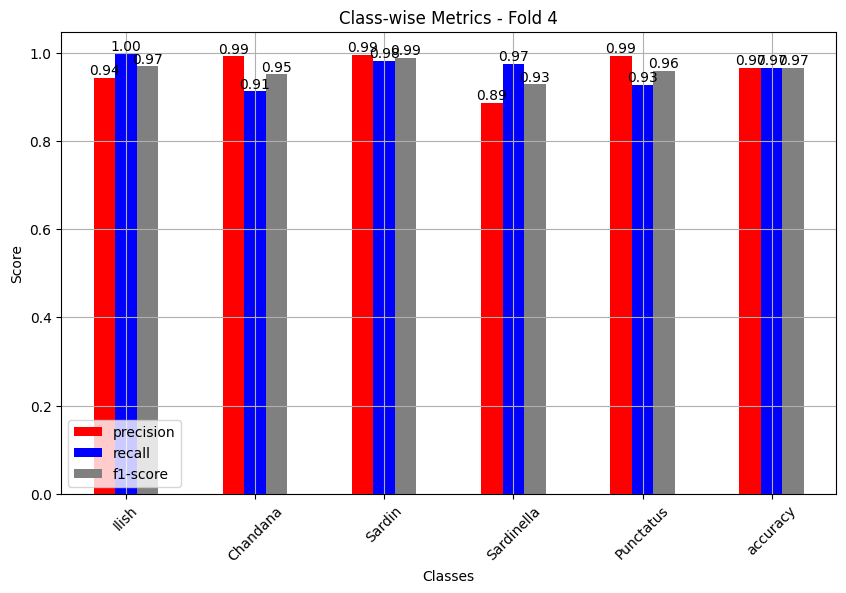

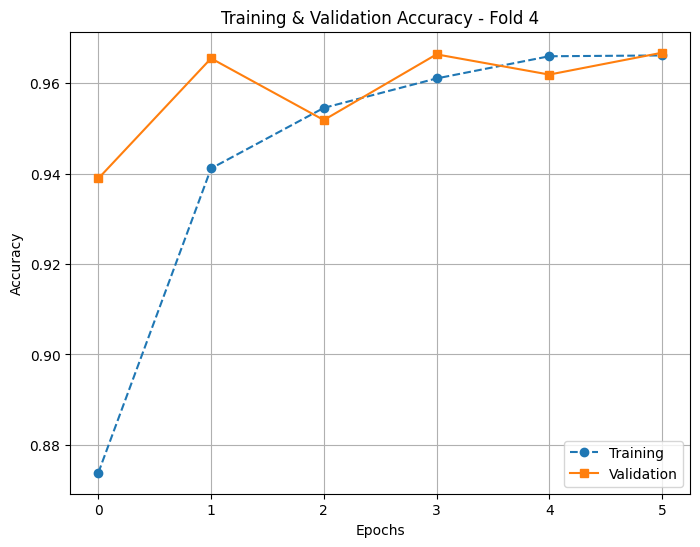

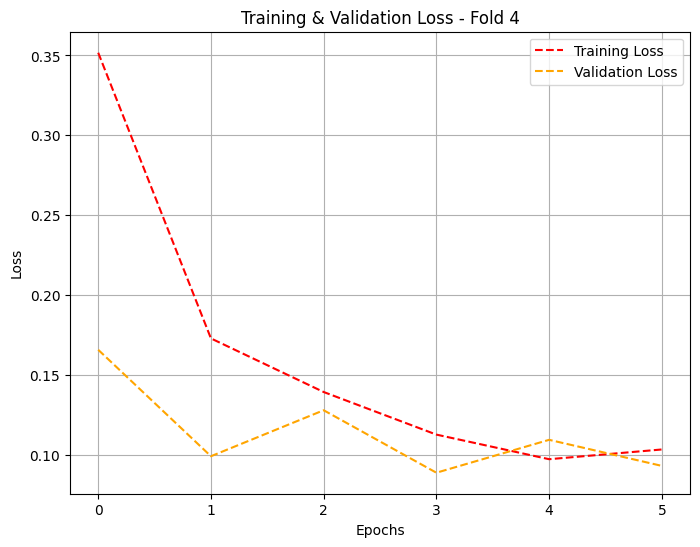

Classification Report - Fold 4:
              precision    recall  f1-score   support

       Ilish       0.94      1.00      0.97       700
    Chandana       0.99      0.91      0.95       400
      Sardin       0.99      0.98      0.99       600
  Sardinella       0.89      0.97      0.93       200
   Punctatus       0.99      0.93      0.96       300

    accuracy                           0.97      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.97      0.97      0.97      2200


Evaluating Fold 5:
275/275 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step


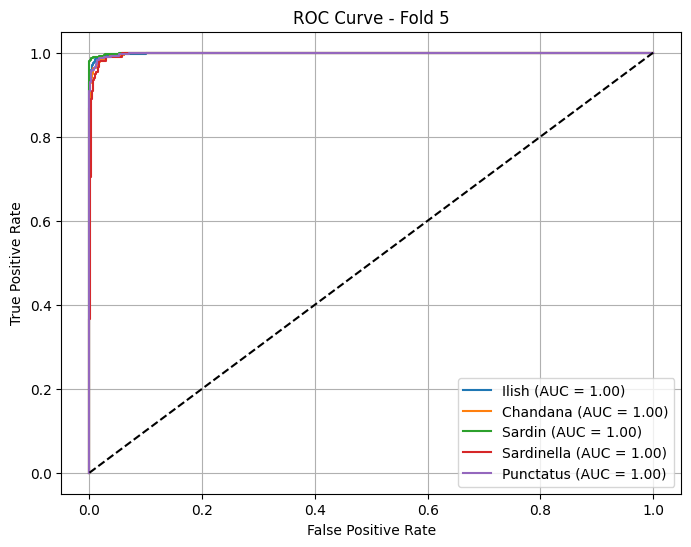

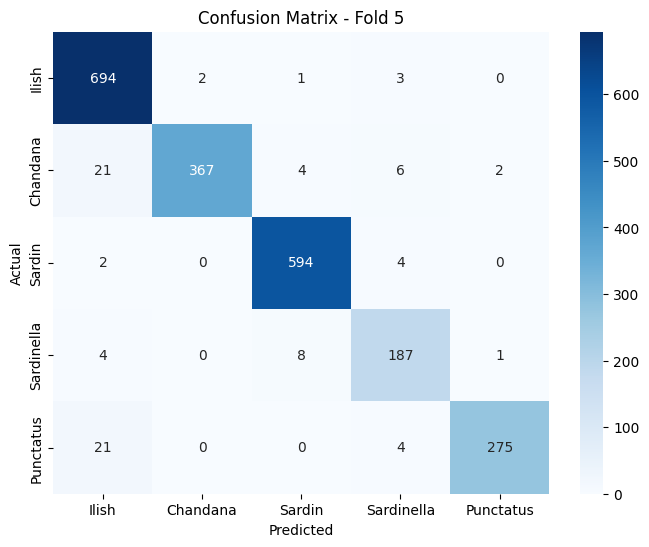

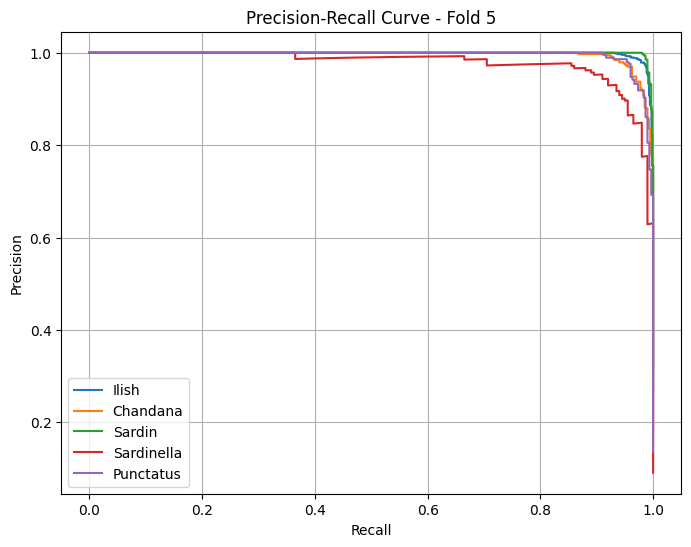

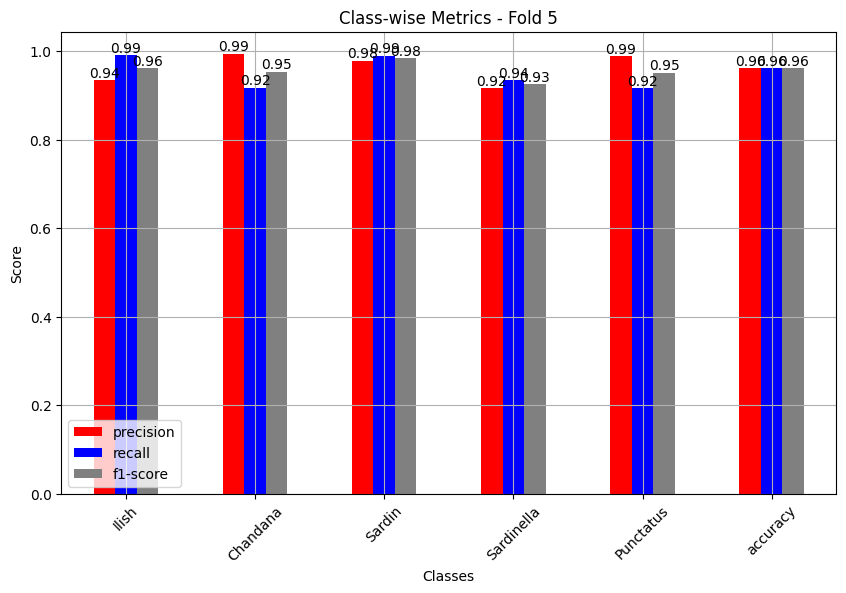

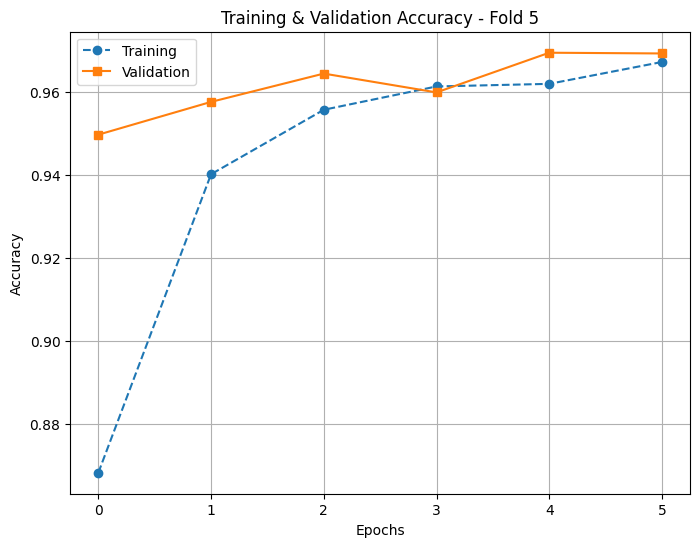

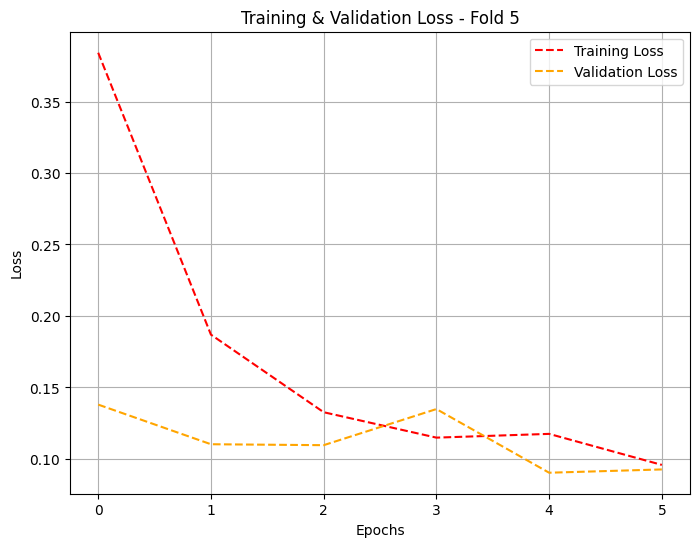

Classification Report - Fold 5:
              precision    recall  f1-score   support

       Ilish       0.94      0.99      0.96       700
    Chandana       0.99      0.92      0.95       400
      Sardin       0.98      0.99      0.98       600
  Sardinella       0.92      0.94      0.93       200
   Punctatus       0.99      0.92      0.95       300

    accuracy                           0.96      2200
   macro avg       0.96      0.95      0.96      2200
weighted avg       0.96      0.96      0.96      2200


Combined Results for All Folds:


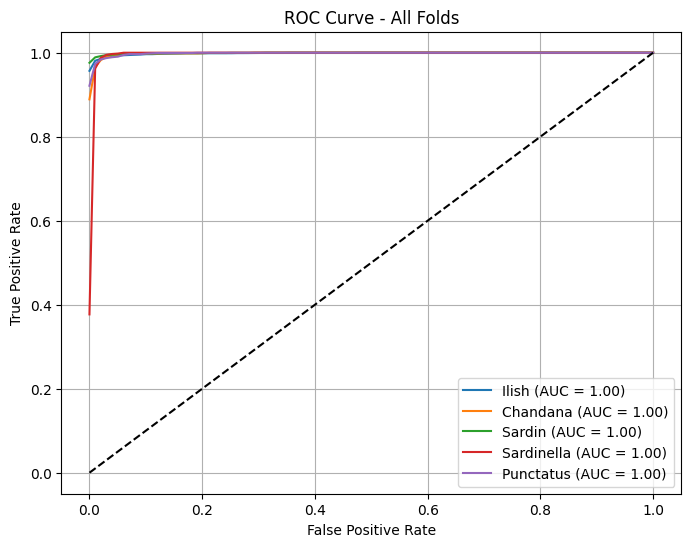

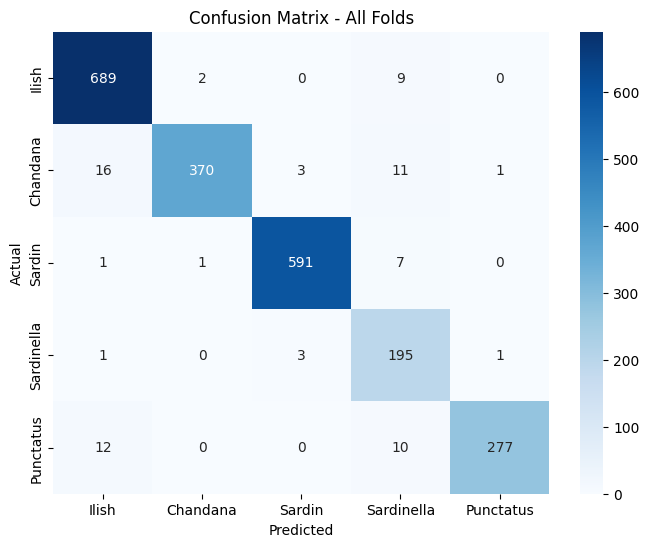

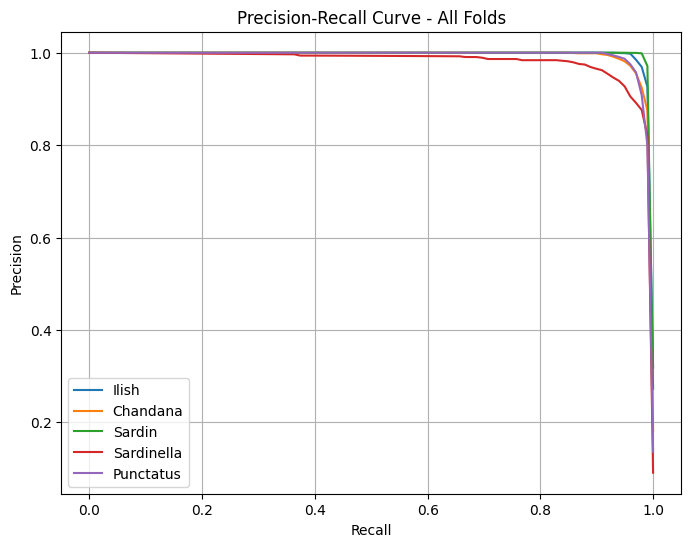

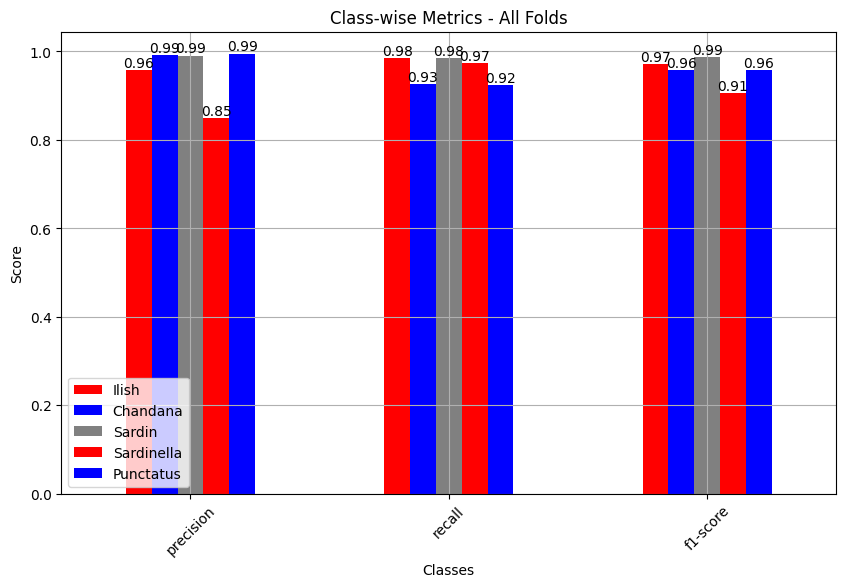

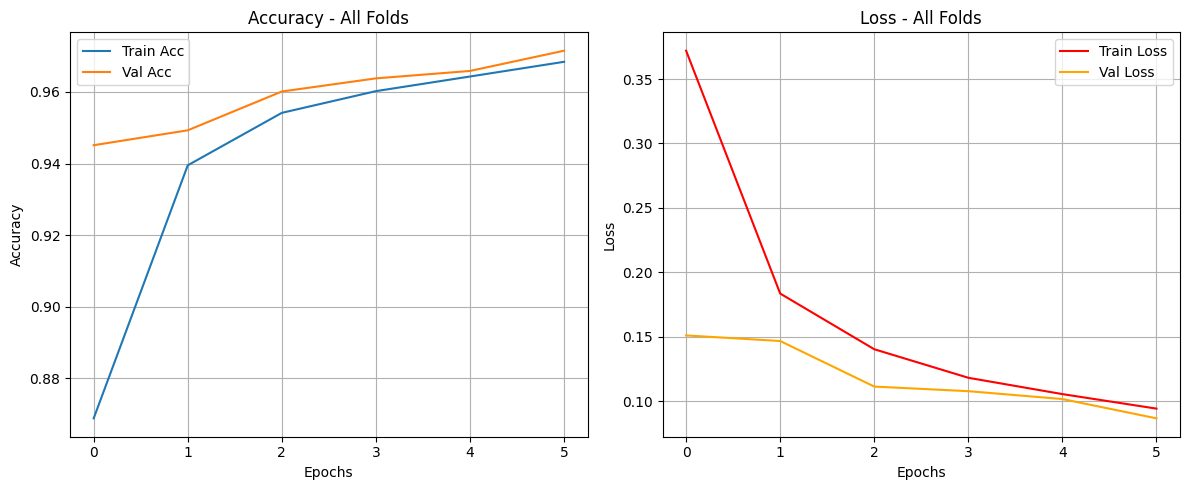


Final Combined Report (Learnable Weighted Ensemble):
              precision    recall  f1-score   support

       Ilish       0.96      0.99      0.98       700
    Chandana       0.99      0.94      0.96       400
      Sardin       0.99      0.99      0.99       600
  Sardinella       0.87      0.99      0.93       200
   Punctatus       1.00      0.92      0.96       300

    accuracy                           0.97      2200
   macro avg       0.96      0.97      0.96      2200
weighted avg       0.97      0.97      0.97      2200

Final Accuracy: 0.9714, F1-Score: 0.9715


In [6]:
# Install required packages
!pip install imbalanced-learn

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Lambda
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
from collections import Counter

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"{len(gpus)} GPUs detected.")
else:
    print("No GPU detected. Running on CPU.")

# Parameters
input_shape = (224, 224, 3)
num_classes = 5
batch_size = 8
epochs = 6
k_folds = 5
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Assuming X and Y are loaded
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Normalize in batches (commented out)
# def normalize_in_batches(data, batch_size=1000):
#     data = data.astype('float32')
#     for i in range(0, len(data), batch_size):
#         data[i:min(i + batch_size, len(data))] /= 255.0
#     return data

# X_train_scaled = normalize_in_batches(X_train)
# X_test_scaled = normalize_in_batches(X_test)
X_train_scaled = X_train  # Use raw data as-is
X_test_scaled = X_test    # Use raw data as-is

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled.reshape(X_train_scaled.shape[0], -1), Y_train)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Image Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

def batch_generator(X, Y, batch_size=32):
    size = X.shape[0]
    while True:
        indices = np.random.permutation(size)
        for start in range(0, size, batch_size):
            batch_idx = indices[start:min(start + batch_size, size)]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            augmented_images = next(datagen.flow(X_batch, shuffle=False, batch_size=batch_size))
            yield augmented_images, Y_batch  # Sparse labels for sparse_categorical_crossentropy

# Define Base Models
def create_base_model(input_shape=(224, 224, 3), model_type='ResNet'):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape) if model_type == 'ResNet' else EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers[:-5]:
        layer.trainable = False
    for layer in base.layers[-5:]:
        layer.trainable = True
    return base

# Define Ensemble Model with Fixed Shape and Type Correction
def create_ensemble_model(input_shape=(224, 224, 3), num_classes=5):
    # Create base models
    model1 = create_base_model(input_shape, model_type='ResNet')
    model2 = create_base_model(input_shape, model_type='EfficientNet')

    # Rename layers to avoid name clashes
    for layer in model1.layers:
        layer._name = f"resnet_{layer.name}"
    for layer in model2.layers:
        layer._name = f"efficientnet_{layer.name}"

    input_layer = Input(shape=input_shape)
    output1 = model1(input_layer)
    output2 = model2(input_layer)

    output1 = GlobalAveragePooling2D()(output1)  # Shape: (None, 2048) for ResNet50
    output2 = GlobalAveragePooling2D()(output2)  # Shape: (None, 1280) for EfficientNetB0

    # Project both outputs to a common dimension (e.g., 1280)
    output1 = Dense(1280, activation='relu')(output1)  # Outputs float32 by default
    output2 = Dense(1280, activation='relu')(output2)  # Outputs float32 by default

    # # Cast outputs to float16 to match alpha and mixed precision policy
    # output1 = tf.cast(output1, tf.float16)
    # output2 = tf.cast(output2, tf.float16)

    # Cast outputs to float16 using Lambda layer to match alpha and mixed precision policy
    output1 = Lambda(lambda x: tf.cast(x, tf.float16))(output1)
    output2 = Lambda(lambda x: tf.cast(x, tf.float16))(output2)

    # alpha = tf.Variable(0.5, trainable=True, dtype=tf.float16, name="alpha")
    # ensemble_output = Lambda(lambda x: alpha * x[0] + (1 - alpha) * x[1],
    #                          output_shape=(1280,))([output1, output2])

    alpha = tf.Variable(0.5, trainable=True, dtype=tf.float16, name="alpha")
    ensemble_output = Lambda(lambda x: alpha * tf.cast(x[0], tf.float16) + (1 - alpha) * tf.cast(x[1], tf.float16),
                         output_shape=(1280,))([output1, output2])

    x = Dense(128, activation='relu')(ensemble_output)
    x = Dropout(0.5)(x)
    final_output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=final_output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Training
def train_with_kfold(X_train, Y_train, X_test, Y_test, k=5, batch_size=32, epochs=6):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    histories = []
    trained_models = []

    with tf.device('/GPU:0'):
        for fold_no, (train_idx, val_idx) in enumerate(skf.split(X_train, Y_train), 1):
            print(f"Training Fold {fold_no}/{k}")
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

            ensemble_model = create_ensemble_model(input_shape, num_classes)

            train_gen = batch_generator(X_train_fold, Y_train_fold, batch_size)
            val_gen = batch_generator(X_val_fold, Y_val_fold, batch_size)

            callbacks = [
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
                ModelCheckpoint(f'best_ensemble_model_{fold_no}.weights.h5', save_best_only=True,
                                monitor='val_accuracy', mode='max', save_weights_only=True),
                EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
            ]

            history = ensemble_model.fit(train_gen, validation_data=val_gen, epochs=epochs,
                                         steps_per_epoch=len(X_train_fold)//batch_size,
                                         validation_steps=len(X_val_fold)//batch_size, callbacks=callbacks, verbose=1)

            histories.append(history)
            trained_models.append(ensemble_model)

            tf.keras.backend.clear_session()
            gc.collect()

    return histories, trained_models

# Evaluation and Plotting
def evaluate_and_plot(histories, X_test, Y_test, trained_models):
    ensemble_probs_list, ensemble_preds_list = [], []

    with tf.device('/GPU:0'):
        # Fold-wise Visualization
        print("\nFold-by-Fold Visualizations:")
        for fold_no, (model, history) in enumerate(zip(trained_models, histories), 1):
            print(f"\nEvaluating Fold {fold_no}:")
            probs = model.predict(X_test, batch_size=8)
            preds = np.argmax(probs, axis=1)
            ensemble_probs_list.append(probs)
            ensemble_preds_list.append(preds)

            # Fold-wise Plots
            def plot_roc_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], 'k--')
                plt.title(f'ROC Curve - Fold {fold_no}')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_confusion_fold(Y_test, preds, fold_no):
                cm = confusion_matrix(Y_test, preds)
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
                plt.title(f'Confusion Matrix - Fold {fold_no}')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

            def plot_pr_fold(Y_test, probs, fold_no):
                plt.figure(figsize=(8, 6))
                for i, cls in enumerate(class_labels):
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    plt.plot(recall, precision, label=cls)
                plt.title(f'Precision-Recall Curve - Fold {fold_no}')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_metrics_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels, output_dict=True)
                df = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])[['precision', 'recall', 'f1-score']]
                df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
                for p in plt.gca().patches:
                    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
                plt.title(f'Class-wise Metrics - Fold {fold_no}')
                plt.xlabel('Classes')
                plt.ylabel('Score')
                plt.xticks(rotation=45)
                plt.legend()
                plt.grid()
                plt.show()

            def plot_acc_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['accuracy'], label='Training', linestyle='dashed', marker='o')
                plt.plot(history.history['val_accuracy'], label='Validation', marker='s')
                plt.title(f'Training & Validation Accuracy - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid()
                plt.show()

            def plot_loss_fold(history, fold_no):
                plt.figure(figsize=(8, 6))
                plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
                plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
                plt.title(f'Training & Validation Loss - Fold {fold_no}')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid()
                plt.show()

            def print_report_fold(Y_test, preds, fold_no):
                report = classification_report(Y_test, preds, target_names=class_labels)
                print(f"Classification Report - Fold {fold_no}:\n{report}")

            # Execute Fold-wise Plots
            plot_roc_fold(Y_test, probs, fold_no)
            plot_confusion_fold(Y_test, preds, fold_no)
            plot_pr_fold(Y_test, probs, fold_no)
            plot_metrics_fold(Y_test, preds, fold_no)
            plot_acc_fold(history, fold_no)
            plot_loss_fold(history, fold_no)
            print_report_fold(Y_test, preds, fold_no)

            tf.keras.backend.clear_session()
            gc.collect()

        # Combined Visualizations
        print("\nCombined Results for All Folds:")
        def plot_roc_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_fpr = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                tprs, aucs = [], []
                for probs in probs_list:
                    fpr, tpr, _ = roc_curve((Y_test == i).astype(int), probs[:, i])
                    tprs.append(np.interp(mean_fpr, fpr, tpr))
                    aucs.append(auc(fpr, tpr))
                mean_tpr = np.mean(tprs, axis=0)
                mean_auc = auc(mean_fpr, mean_tpr)
                plt.plot(mean_fpr, mean_tpr, label=f'{cls} (AUC = {mean_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title('ROC Curve - All Folds')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_confusion_combined(Y_test, preds_list):
            mean_cm = np.mean([confusion_matrix(Y_test, preds) for preds in preds_list], axis=0)
            plt.figure(figsize=(8, 6))
            sns.heatmap(mean_cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
            plt.title('Confusion Matrix - All Folds')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

        def plot_pr_combined(Y_test, probs_list):
            plt.figure(figsize=(8, 6))
            mean_recall = np.linspace(0, 1, 100)
            for i, cls in enumerate(class_labels):
                precisions = []
                for probs in probs_list:
                    precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), probs[:, i])
                    precisions.append(np.interp(mean_recall[::-1], recall[::-1], precision[::-1])[::-1])
                mean_precision = np.mean(precisions, axis=0)
                plt.plot(mean_recall, mean_precision, label=cls)
            plt.title('Precision-Recall Curve - All Folds')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid()
            plt.show()

        def plot_metrics_combined(Y_test, preds_list):
            reports = [classification_report(Y_test, preds, target_names=class_labels, output_dict=True) for preds in preds_list]
            mean_report = {metric: {cls: np.mean([r[cls][metric] for r in reports]) for cls in class_labels}
                           for metric in ['precision', 'recall', 'f1-score']}
            df = pd.DataFrame(mean_report).T
            df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(10, 6))
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            plt.title('Class-wise Metrics - All Folds')
            plt.xlabel('Classes')
            plt.ylabel('Score')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid()
            plt.show()

        def plot_acc_loss_combined(histories):
            plt.figure(figsize=(12, 5))
            mean_acc = np.mean([h.history['accuracy'] for h in histories], axis=0)
            mean_val_acc = np.mean([h.history['val_accuracy'] for h in histories], axis=0)
            mean_loss = np.mean([h.history['loss'] for h in histories], axis=0)
            mean_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)
            plt.subplot(1, 2, 1)
            plt.plot(mean_acc, label='Train Acc')
            plt.plot(mean_val_acc, label='Val Acc')
            plt.title('Accuracy - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid()
            plt.subplot(1, 2, 2)
            plt.plot(mean_loss, label='Train Loss', color='red')
            plt.plot(mean_val_loss, label='Val Loss', color='orange')
            plt.title('Loss - All Folds')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.show()

        def print_final_report(Y_test, probs_list):
            mean_probs = np.mean(probs_list, axis=0)
            final_preds = np.argmax(mean_probs, axis=1)
            report = classification_report(Y_test, final_preds, target_names=class_labels)
            acc = accuracy_score(Y_test, final_preds)
            f1 = f1_score(Y_test, final_preds, average='weighted')
            print(f"\nFinal Combined Report (Learnable Weighted Ensemble):\n{report}")
            print(f"Final Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")

        # Execute Combined Plots
        plot_roc_combined(Y_test, ensemble_probs_list)
        plot_confusion_combined(Y_test, ensemble_preds_list)
        plot_pr_combined(Y_test, ensemble_probs_list)
        plot_metrics_combined(Y_test, ensemble_preds_list)
        plot_acc_loss_combined(histories)
        print_final_report(Y_test, ensemble_probs_list)

# Train and Evaluate
histories, trained_models = train_with_kfold(X_train_resampled, Y_train_resampled, X_test_scaled, Y_test)
print("Training Complete with Learnable Weighted Ensemble.")
evaluate_and_plot(histories, X_test_scaled, Y_test, trained_models)

#End